# The Sparks Foundation

Graduate Rotational Intership Program-(GRIP)


Author : Prabhat Agnihotri

Task 2 : Prediction using Unsupervised Machine Learning

In the realm of the Iris dataset, I shall wield the magical K-Means clustering technique to unite and visualize similar data points, unraveling the hidden patterns in a captivating display of data artistry.

# Importing Required Libraries

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import sklearn.metrics as sm


# import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


# Importing Data

In [2]:
url = "C:/Users/prate/Downloads/Iris.csv"
data = pd.read_csv(url)

# Exploring Data

In [3]:
# check the size of data
data.shape

(150, 6)

In [4]:
# first few rows of a DataFrame 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# last few rows of a DataFrame 
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# checking statistical properties of data
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# checking the shape of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Data Pre-Processing

In [9]:
# dropping the columns of Id ans species
data = data.drop(['Id', 'Species'], axis = 1) 

In [10]:
# display the rearranged data
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Identifying and Removing Outliers in Data

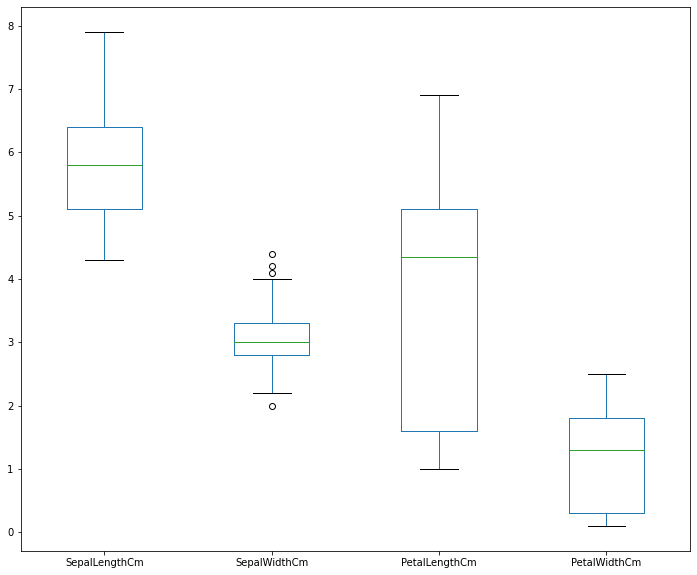

In [11]:
# checking for outliers by boxplot
plt.rcParams['figure.figsize'] = (12,10)
data.plot(kind = 'box')
plt.show()

Filtering Outliers in Sepal Width to Safeguard the Authenticity of Clusters

In [12]:
# Removing outliers using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5* IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]

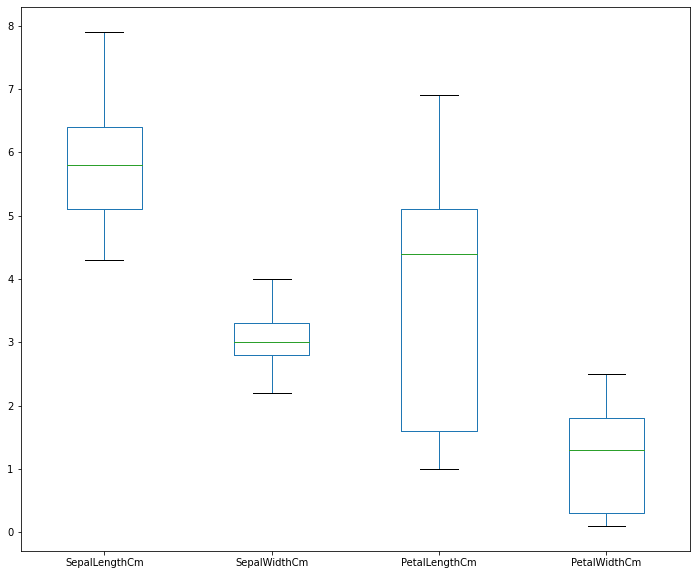

In [13]:
# Plotting boxplot after removing Outliers
plt.rcParams['figure.figsize'] = (12,10)
data.plot(kind = 'box')
plt.show()

Our data is free of Outliers

# K-Means Clustering

 Determining the Optimal Value of K with the Elbow Plot

In [14]:
# Data arrangement
x = data.iloc[:,[0,1,2,3]].values

In [15]:
# Observing Within Cluster Sum of Squares (WCSS) for Various Configurations
wcss = [] # Empty list to store the wcss
y = range(1,11)
for i in y:
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans = kmeans.fit(x) #fit the model on prepared data
    wcss.append(kmeans.inertia_) 
wcss    

[655.0325342465754,
 143.860075,
 73.51656472013659,
 53.3048778073286,
 42.54863475177305,
 36.50818840579711,
 31.74186517347387,
 28.335926501035203,
 26.432709527949804,
 24.827200643559344]

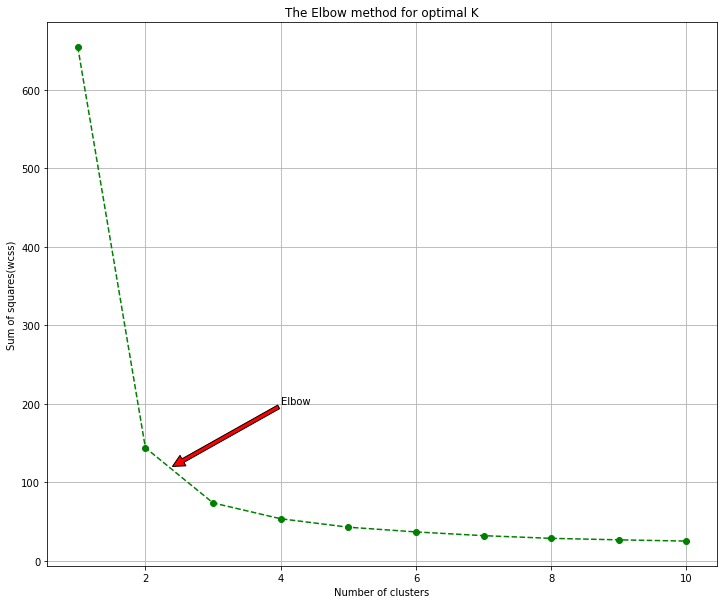

In [16]:
# Visual the elbow plot to find the optimal value of k
plt.plot(y, wcss, "go--")
plt.title("The Elbow method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("Sum of squares(wcss)")
plt.annotate("Elbow",xytext = (4,200), xy = (2.4, 120), arrowprops = {"facecolor":"red"})
plt.grid()
plt.show()

Within the enigmatic landscape of the Elbow plot, the value of K dances along the x-axis while the mesmerizing within cluster sum of squares (WCSS) swirls on the y-axis. As we gaze upon this captivating visual, a distinct arrow emerges, pointing towards a juncture where the Elbow gracefully forms.

Behold, the Elbow unveils its wisdom, bestowing upon us the revelation that the optimal value for K lies within the realm of 3. Thus, the Elbow method illuminates our path, guiding us towards the ideal configuration for clustering our data.

# Optimum value of k using silhouette plot

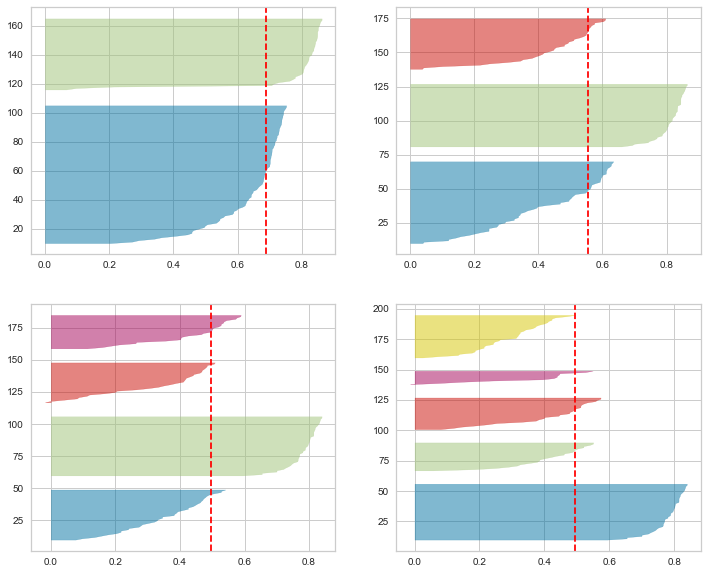

In [19]:
# Initialise KMeans
kmeans_models = [KMeans(n_clusters=k, random_state=42).fit(x) for k in range(2, 11)]
s = [silhouette_score(x, model.labels_) for model in kmeans_models[1:]]

# Plotting silhouette visualizer
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, model in enumerate(kmeans_models[:4]):
    km_labels = model.fit_predict(x)
    q, mod = divmod(i, 2)
    
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q][mod])
    visualizer.fit(x)

Behold the enchanting silhouette plots that lay before you, revealing the essence of clusters 2, 3, 4, and 5.

Upon closer inspection, the silhouette plots indicate that clusters 4 and 5 are not ideal choices. Their points fall below the average silhouette scores, indicating their lack of cohesion and harmony.

The decision between 2 and 3 clusters becomes more uncertain as we delve into the silhouette analysis. The silhouette plot for 2 clusters displays a larger second cluster, formed by combining smaller sub-clusters. On the other hand, the silhouette plots for 3 clusters show similar thickness, suggesting clusters of comparable sizes. Additionally, the silhouette scores for 3 clusters are well above average, making them the most favorable choice.

Thus, we can conclude that the silhouette plots, in their simplicity, point towards the optimal number of clusters as 3. This choice exhibits balance, coherence, and high silhouette scores, making it the best 'k' value for our analysis.

In [ ]:
# Plotting the silhouette score
plt.plot(range(3,11),s)
plt.xlabel('values of k')
plt.ylabel('silhouette score')
plt.title('silhouette analysis for optimal k')
plt.show()

As we delve into the fascinating world of data analysis, we come across a remarkable plot that showcases the silhouette score. It becomes evident that the score reaches its highest point when the number of clusters, represented by 'k', is set to 3. Combining the information from this plot with other techniques, we confidently determine that the optimal choice for the number of clusters is indeed 3.

# Visualizing the clusters

In [21]:
# creating the kmeans classifiers
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

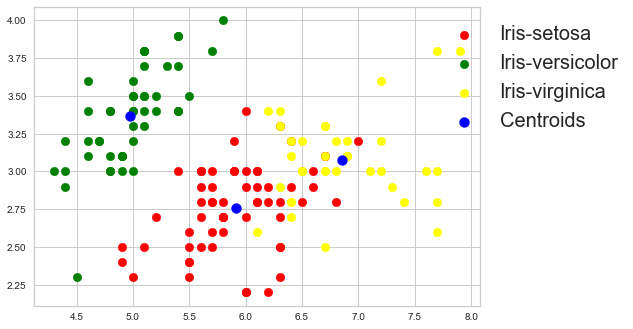

In [31]:
# Visualizing the clusters for the first two columns of the data
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1] ,s = 75 ,c = 'red' ,label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1] ,s = 75 ,c = 'green' ,label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1] ,s = 75 ,c = 'yellow' ,label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1] ,s = 100 ,c = 'blue',label = 'Centroids')
plt.legend(loc = 1 ,bbox_to_anchor = (1.35,1) ,prop = {"size":20})
plt.show()

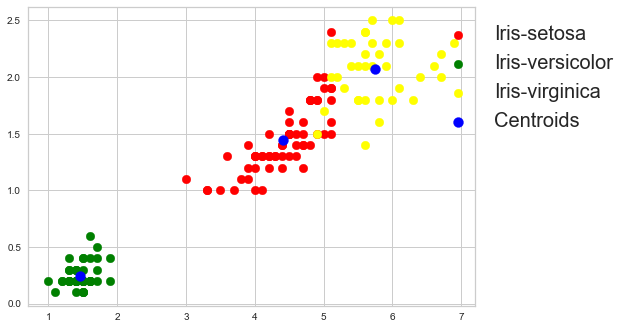

In [32]:
# Visualizing the clusters for the 3rd and 4th columns of the data
plt.scatter(x[y_kmeans == 0,2],x[y_kmeans == 0,3] ,s = 75 ,c = 'red' ,label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,2],x[y_kmeans == 1,3] ,s = 75 ,c = 'green' ,label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,2],x[y_kmeans == 2,3] ,s = 75 ,c = 'yellow' ,label = 'Iris-virginica')

# Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,2] ,kmeans.cluster_centers_[:,3] ,s = 100 ,c = 'blue' ,label = 'Centroids')
plt.legend(loc = 1 ,bbox_to_anchor = (1.35,1) ,prop = {"size":20})
plt.show()